In [48]:
# import dependencies
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
# map the items here
from bokeh.io import show, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("cosmetics.csv")

In [32]:
# print the first 5 rows of the dataset
df.head()

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


In [33]:
print(df['Label'].value_counts())

Label
Moisturizer    298
Cleanser       281
Face Mask      266
Treatment      248
Eye cream      209
Sun protect    170
Name: count, dtype: int64


In [34]:
# display 10 samples of the dataframe
display(df.sample(10))

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
1270,Eye cream,BAREMINERALS,BRILLIANT FUTURE™ Age Defense & Renew Eye Cream,38,3.5,Visit the bareMinerals boutique,1,1,1,1,0
1286,Eye cream,CLARINS,Mission Perfection Eye Broad Spectrum SPF 15,50,4.0,"Water, Dimethicone , Phenyl Trimethicone , Tit...",1,1,1,1,1
927,Face Mask,YOUTH TO THE PEOPLE,Superfood Skin Reset Antioxidant Mask,44,4.4,"Water, Kaolin, Organic Glycerin, Organic Brass...",1,1,1,1,1
722,Treatment,MURAD,Acne Clear Control 30-Day Kit,29,3.3,Visit the Murad boutique,1,0,0,1,0
249,Moisturizer,BIOSSANCE,Squalane + Antioxidant Cleansing Oil,30,4.4,"Caprylic/Capric Triglyceride, Polyglyceryl-2 C...",1,1,1,1,1
706,Treatment,REN CLEAN SKINCARE,Evercalm™ Anti-Redness Serum,48,3.8,Visit the REN Clean Skincare boutique,1,1,1,1,1
734,Treatment,AMOREPACIFIC,FUTURE RESPONSE Age Defense Serum,160,4.2,"Camellia Sinensis Leaf Water, Butylene Glycol,...",1,1,1,1,1
390,Cleanser,CLINIQUE,Clarifying Lotion 3,16,4.4,"Water , Alcohol Denat. , Salicylic Acid , Hama...",0,0,0,0,0
141,Moisturizer,BIOSSANCE,Squalane + Probiotic Gel Moisturizer,52,4.4,"Water, Squalane, Glycerin, Dimethicone, Pentyl...",1,1,1,1,1
1130,Eye cream,CAUDALIE,Resveratrol Lift Hyaluronic Acid Eye Lifting Balm,62,4.0,"Water, Glycerin*, Butylene Glycol*, Coco-Capry...",1,1,1,1,1


In [35]:
# filter eye cream
eye_cream = df[df['Label'] == 'Eye cream']
# filter eye cream for dry skin
eye_cream_dry = eye_cream[eye_cream.Dry == 1]
# reset index
eye_cream_dry = eye_cream_dry.reset_index(drop=True)

# Tokenizing the Ingredients
{ "ingredient": index value, ... }

In [36]:
def token_ingredients(type):
  # initialize dictionary, list and initial index
  ingredient_index = {}
  corpus = []
  index = 0
  # For loop for tokenization
  for i in range(len(type)):
        ingredients = type['Ingredients'][i]
        ingredients_lower = ingredients.lower()
        tokens = ingredients_lower.split(', ')
        corpus.append(tokens)
        for ingredient in tokens:
            if ingredient not in ingredient_index:
                ingredient_index[ingredient] = index
                index += 1
  return ingredient_index, corpus
# print the list of the ingredients alongside their index in the list of ingredients
print(token_ingredients(eye_cream_dry))

({'water': 0, 'glycerin': 1, 'dicaprylyl carbonate': 2, 'cetearyl alcohol': 3, 'caprylic/capric triglyceride': 4, 'hydroxyethyl acrylate/sodium acryloyldimethyl taurate copolymer': 5, 'sodium ascorbyl phosphate': 6, 'cetearyl olivate': 7, 'sorbitan olivate': 8, 'sclerocarya birrea seed oil': 9, 'persea gratissima (avocado) oil': 10, 'plukenetia volubilis seed oil': 11, 'magnesium ascorbyl phosphate': 12, 'ceteareth-6 olivate': 13, 'tetrahexyldecyl ascorbate': 14, 'ascorbyl glucoside': 15, 'ascorbyl palmitate': 16, 'palmitoyl tripeptide-1': 17, 'glycine soja (soybean) sterols': 18, 'linoleic acid': 19, 'phospholipids': 20, 'ceramide np': 21, 'glycine soja (soybean) protein': 22, 'ceramide ap': 23, 'phytosphingosine': 24, 'cholesterol': 25, 'ceramide eop': 26, 'cucumis sativus (cucumber) fruit extract': 27, 'camellia sinensis leaf extract': 28, 'palmitoyl dipeptide-5 diaminobutyroyl hydroxythreonine': 29, 'palmitoyl dipeptide-5 diaminohydroxybutyrate': 30, 'dipeptide diaminobutyroyl benz

In [37]:
# find the ingredients in the list
ingredient_idx, corpus = token_ingredients(eye_cream_dry)
print("The index for glycerin is", ingredient_idx['glycerin'])

The index for glycerin is 1


# initializing a document-term matrix

In [38]:
A = eye_cream_dry.shape[0]
B = len(ingredient_idx)

# initialize a matrix that is filled with zeros
matrix = np.zeros((A, B))
print(matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [39]:
# if the ingredient is in a cosmetics, the value is 1 or else it remains a 0
def fill_the_matrix(tokens, matrix):
  x = np.zeros(matrix.shape[1])
  for ingredient in tokens:
    idx = ingredient_idx[ingredient]
    x[idx] = 1
  return x

# make the document term matrix
i = 0
for tokens in corpus:
  x = fill_the_matrix(tokens, matrix)
  matrix[i] = x
  i += 1

In [40]:
# print the matrix and check its size
print(matrix)
print("The size of the matrix is ", matrix.shape)

[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 1. 1. 1.]]
The size of the matrix is  (134, 1723)


In [41]:
# dimension reduction with tsne
model = TSNE(n_components = 2, learning_rate = 200, random_state = 42)
tsne_features = model.fit_transform(matrix)

# Make X, Y columns
eye_cream_dry['X'] = tsne_features[:, 0]
eye_cream_dry['Y'] = tsne_features[:, 1]

In [42]:
output_notebook()
# make a source and a scatter plot
source = ColumnDataSource(eye_cream_dry)
plot = figure(x_axis_label = 'T-SNE 1', y_axis_label = 'T-SNE 2', width = 500, height = 400)
plot.circle(x = 'X', y = 'Y', source = source, size = 10, color = '#FF7373', alpha = .8)

GlyphRenderer(id='p1042', ...)

In [43]:
# create a hover tool for when the cursor is directly over a glyph
hover = HoverTool(tooltips = [('Item', '@Name'),
                              ('Brand', '@Brand'),
                              ('Price', '$@Price'),
                              ('Rank', '@Rank')])
plot.add_tools(hover)

In [44]:
# show the plot of the compositions
# such as cosmetic items based on their ingredient compositions, in a 2D or 3D space in this case is the eye cream
# Each point on the graph represents a cosmetic product, and the distances between points indicate similarities in ingredient compositions.
show(plot)

# Comparison between 2 products

In [46]:
product_1 = eye_cream_dry[eye_cream_dry['Name'] == "Magic Eye Rescue Cream"]
product_2 = eye_cream_dry[eye_cream_dry['Name'] == "Advanced Night Repair Eye Serum Synchronized Complex II"]
# Display each item's data and ingredients
display(product_1)
print(product_1.Ingredients.values)
display(product_2)
print(product_2.Ingredients.values)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y
85,Eye cream,CHARLOTTE TILBURY,Magic Eye Rescue Cream,60,3.9,"Water, Caprylic/Capric Triglyceride, Butylene ...",1,1,1,1,1,134.840271,-189.80455


["Water, Caprylic/Capric Triglyceride, Butylene Glycol, Polysorbate 60, Olus Oil (Vegetable Oil)/Huile Végétale, Peg-7 Glyceryl Cocoate, Glycerin, Butyrospermum Parkii (Shea Butter), Peg-8, Ethylhexyl Stearate, Dicaprylyl Ether, Sorbitan Stearate, Hydroxyethyl Acrylate/Sodium Acryloyldimethyl Taurate Copolymer, Olive Oil Peg-7 Esters, Phenoxyethanol, Saccharide Isomerate, C12-16 Alcohols, Cera Alba (Beeswax)/Cire D'abeille, Glyceryl Stearate, Hydrogenated Castor Oil, Squalane, Ethylhexylglycerin, Chlorphenesin, Hydrogenated Lecithin, Hydrolyzed Rice Protein, Palmitic Acid, Xanthan Gum, Chondrus Crispus Extract, Disodium Edta, Helianthus Annuus (Sunflower) Seed Oil, Polysorbate 20, Sorbitan Isostearate, Sodium Hydroxide, Glycine Soja (Soybean) Protein, Superoxide Dismutase, Citric Acid, Hydroxypropyl Cyclodextrin, Tocopherol, Sodium Citrate, Sodium Benzoate, Sodium Pca, Ascorbyl Palmitate, Daphne Odora Callus Extract, Sodium Dextran Sulfate, Nicotiana Sylvestris Leaf Cell Culture, Alu

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y
40,Eye cream,ESTÉE LAUDER,Advanced Night Repair Eye Serum Synchronized C...,66,3.5,Advanced Night Rp Eye Sr Syn Cmpii Division: E...,1,1,1,1,1,113.26088,177.904282


["Advanced Night Rp Eye Sr Syn Cmpii Division: El (Estee Lauder)Ingredients: Water , Bifida Ferment Lysate , Caprylic/Capric Triglyceride , Dimethicone , Nylon-12 , Cetyl Ricinoleate , Propanediol , Bis-Peg-18 Methyl Ether Dimethyl Silane , Glycerin , Trehalose , Algae Extract , Morus Bombycis (Mulberry) Root Extract , Scutellaria Baicalensis Root Extract , Lactobacillus Ferment , Triticum Vulgare (Wheat) Germ Extract , Betula Alba (Birch) Extract , Hydrolyzed Algin , Poria Cocos Sclerotium Extract , Glycine Soja (Soybean) Seed Extract , Sucrose , Yeast Extract/Faex/Extrait De Levure , Hydrogenated Lecithin , Hordeum Vulgare (Barley) Extract/Extrait D'Orge , Cholesterol , Anthemis Nobilis (Chamomile) , Tocopheryl Acetate , Sodium Rna , Tromethamine , Caffeine , Caprylyl Glycol , Oleth-10 , Phytosphingosine , Squalane , Ammonium Acryloyldimethyltaurate/Vp Copolymer , Potassium Sulfate , Biosaccharide Gum - 1 , Lecithin , Sodium Hyaluronate , Acrylates/C10-30 Alkyl Acrylate Crosspolymer 

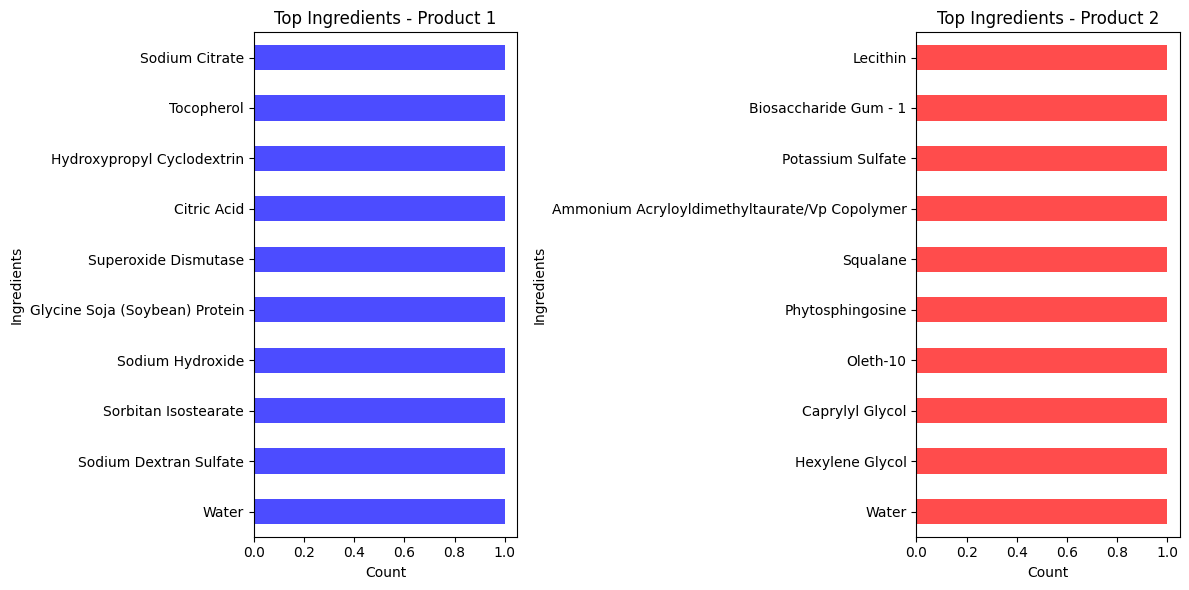

In [51]:
# Define the products with their ingredients
product_1 = {
    'Name': "Magic Eye Rescue Cream",
    'Ingredients': "Water, Caprylic/Capric Triglyceride, Butylene Glycol, Polysorbate 60, Olus Oil (Vegetable Oil)/Huile Végétale, Peg-7 Glyceryl Cocoate, Glycerin, Butyrospermum Parkii (Shea Butter), Peg-8, Ethylhexyl Stearate, Dicaprylyl Ether, Sorbitan Stearate, Hydroxyethyl Acrylate/Sodium Acryloyldimethyl Taurate Copolymer, Olive Oil Peg-7 Esters, Phenoxyethanol, Saccharide Isomerate, C12-16 Alcohols, Cera Alba (Beeswax)/Cire D'abeille, Glyceryl Stearate, Hydrogenated Castor Oil, Squalane, Ethylhexylglycerin, Chlorphenesin, Hydrogenated Lecithin, Hydrolyzed Rice Protein, Palmitic Acid, Xanthan Gum, Chondrus Crispus Extract, Disodium Edta, Helianthus Annuus (Sunflower) Seed Oil, Polysorbate 20, Sorbitan Isostearate, Sodium Hydroxide, Glycine Soja (Soybean) Protein, Superoxide Dismutase, Citric Acid, Hydroxypropyl Cyclodextrin, Tocopherol, Sodium Citrate, Sodium Benzoate, Sodium Pca, Ascorbyl Palmitate, Daphne Odora Callus Extract, Sodium Dextran Sulfate, Nicotiana Sylvestris Leaf Cell Culture, Aluminum Hydroxide, Retinol, Plumeria Rubra Flower Extract, Borago Officinalis Seed Oil, Tocopheryl Acetate, Ascorbic Acid, Lecithin, Potassium Sorbate, Retinyl Palmitate, Ascorbyl Tetraisopalmitate, Titanium Dioxide (Ci 77891), Iron Oxides (Ci 77491, Ci 77492)."
}

product_2 = {
    'Name': "Advanced Night Repair Eye Serum Synchronized Complex II",
    'Ingredients': "Water , Bifida Ferment Lysate , Caprylic/Capric Triglyceride , Dimethicone , Nylon-12 , Cetyl Ricinoleate , Propanediol , Bis-Peg-18 Methyl Ether Dimethyl Silane , Glycerin , Trehalose , Algae Extract , Morus Bombycis (Mulberry) Root Extract , Scutellaria Baicalensis Root Extract , Lactobacillus Ferment , Triticum Vulgare (Wheat) Germ Extract , Betula Alba (Birch) Extract , Hydrolyzed Algin , Poria Cocos Sclerotium Extract , Glycine Soja (Soybean) Seed Extract , Sucrose , Yeast Extract/Faex/Extrait De Levure , Hydrogenated Lecithin , Hordeum Vulgare (Barley) Extract/Extrait D'Orge , Cholesterol , Anthemis Nobilis (Chamomile) , Tocopheryl Acetate , Sodium Rna , Tromethamine , Caffeine , Caprylyl Glycol , Oleth-10 , Phytosphingosine , Squalane , Ammonium Acryloyldimethyltaurate/Vp Copolymer , Potassium Sulfate , Biosaccharide Gum - 1 , Lecithin , Sodium Hyaluronate , Acrylates/C10-30 Alkyl Acrylate Crosspolymer , Sodium Acrylates/Acrylonitrogens Copolymer , Hexylene Glycol , Sodium Metabisulfite , Aminopropyl Ascorbyl Phosphate , Tripeptide-32 , Butylene Glycol , Sodium Sulfite , Disodium Edta , Bht , Phenoxyethanol , Mica , Titanium Dioxide (Ci 77891) , Iron Oxides (Ci 77491, Ci 77492, Ci 77499)."
}

# Function to extract and count top N ingredients
def top_n_ingredients(ingredients_str, n=10):
    ingredients_list = [ingredient.strip() for ingredient in ingredients_str.split(',')]
    ingredient_counts = pd.Series(ingredients_list).value_counts().head(n)
    return ingredient_counts

# Get top ingredients for each product
top_n_ingredients_1 = top_n_ingredients(product_1['Ingredients'])
top_n_ingredients_2 = top_n_ingredients(product_2['Ingredients'])

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

top_n_ingredients_1.plot(kind='barh', ax=ax1, color='b', alpha=0.7)
ax1.set_title('Top Ingredients - Product 1')
ax1.set_ylabel('Ingredients')
ax1.set_xlabel('Count')

top_n_ingredients_2.plot(kind='barh', ax=ax2, color='r', alpha=0.7)
ax2.set_title('Top Ingredients - Product 2')
ax2.set_ylabel('Ingredients')
ax2.set_xlabel('Count')

plt.tight_layout()
plt.show()